In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
enroll = pd.read_csv('./data/enrolleds_detail.csv')
enroll.tail(5)

,lecture_id,done_date,user_id
8282,5f266927e67b8fcf4340c093,2020-09-03 16:04:05.555000,9839ad64411238ad6664450ba3e6cc2b
8283,5f266927e67b8fcf4340c094,2020-09-03 16:04:10.446000,9839ad64411238ad6664450ba3e6cc2b
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b
8286,5f275350c107da1758c81135,2020-09-03 15:40:49.006000,9839ad64411238ad6664450ba3e6cc2b


In [28]:
lecture = pd.read_csv('./data/lectures.csv')
lecture.tail(5)

,title,playtime,week,week_order,lecture_id
73,포트포워딩,152,5,14,5f36558829f38171335a8906
74,nohup 설정하기,265,5,15,5f36558829f38171335a8907
75,도메인 구입하기,91,5,16,5f36558829f38171335a8908
76,og 태그,166,5,17,5f36558829f38171335a8909
77,웹개발 5주차 끝,57,5,18,5f36558829f38171335a890a


In [29]:
lecture_count = pd.DataFrame(enroll_detail)
lecture_count.head(3)

,user_id
lecture_id,
5f266927e67b8fcf4340c087,157
5f266927e67b8fcf4340c088,156
5f266927e67b8fcf4340c089,155


In [30]:
lecture_count = lecture_count.reset_index()
lecture_count.head(3)

,lecture_id,user_id
0,5f266927e67b8fcf4340c087,157
1,5f266927e67b8fcf4340c088,156
2,5f266927e67b8fcf4340c089,155


In [31]:
lecture_count = lecture_count.rename(columns={'user_id':'count'})
lecture_count.head(3)

,lecture_id,count
0,5f266927e67b8fcf4340c087,157
1,5f266927e67b8fcf4340c088,156
2,5f266927e67b8fcf4340c089,155


In [32]:
# lecture = lecture.set_index('lecture_id')
# full_lecture = lecture_count.join(lecture, on="lecture_id")
full_lecture = pd.merge(lecture_count, lecture, left_on="lecture_id", right_on="lecture_id")
full_lecture.head(3)

,lecture_id,count,title,playtime,week,week_order
0,5f266927e67b8fcf4340c087,157,웹개발 1주차 오늘 배울 것,532,1,1
1,5f266927e67b8fcf4340c088,156,"HTML, CSS 기본 내용",418,1,2
2,5f266927e67b8fcf4340c089,155,Quiz_간단한 로그인 페이지 만들어보기,251,1,3


In [33]:
enroll_detail = enroll.groupby('lecture_id')['user_id'].count()
enroll_detail

lecture_id
5f266927e67b8fcf4340c087    157
5f266927e67b8fcf4340c088    156
5f266927e67b8fcf4340c089    155
5f266927e67b8fcf4340c08a    154
5f266927e67b8fcf4340c08b    154
                           ... 
5f36558829f38171335a8906     77
5f36558829f38171335a8907     77
5f36558829f38171335a8908     77
5f36558829f38171335a8909     76
5f36558829f38171335a890a     75
Name: user_id, Length: 78, dtype: int64

In [34]:
plt.rcParams['font.family'] = "AppleGothic"

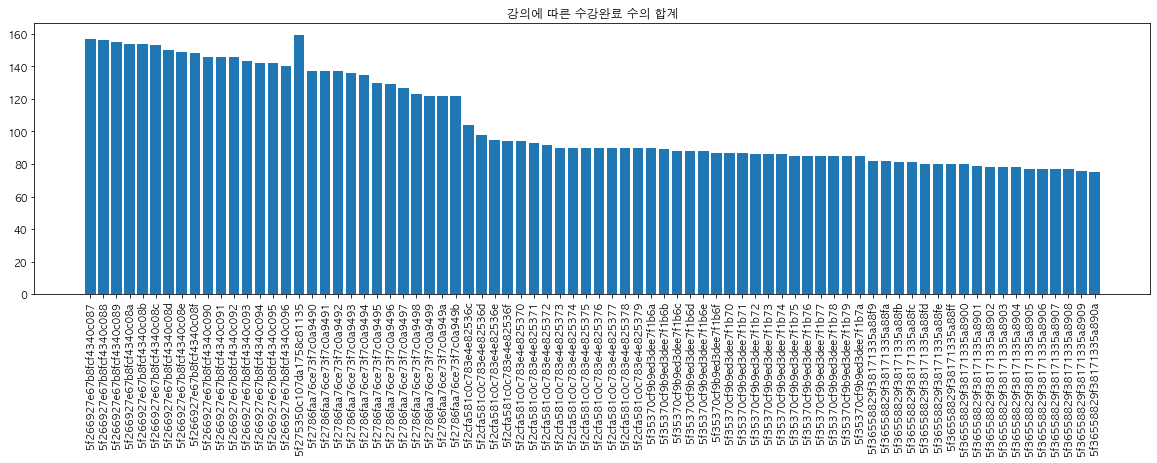

In [35]:
plt.figure(figsize=(20,5))
plt.bar(enroll_detail.index, enroll_detail)
plt.title('강의에 따른 수강완료 수의 합계')
plt.xticks(rotation=90)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77],
 <a list of 78 Text major ticklabel objects>)

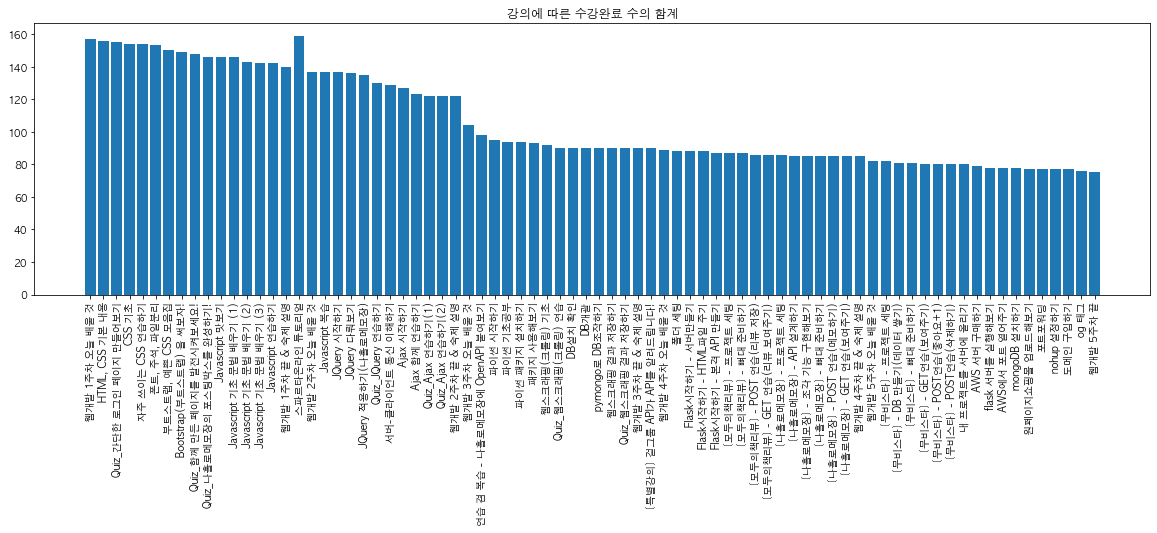

In [36]:
plt.figure(figsize=(20,5))
plt.bar(full_lecture['title'], full_lecture['count'])
plt.title('강의에 따른 수강완료 수의 함계')
plt.xticks(rotation=90)

In [37]:
conda install -c conda-forge wordcloud

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [38]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [39]:
text01 = open('./data/Sequence_01.txt', 'r', encoding='utf-8-sig')
text01

<_io.TextIOWrapper name='./data/Sequence_01.txt' mode='r' encoding='utf-8-sig'>

In [40]:
text01.read()

'그럼 3주차 수업을 시작해 보겠습니다\n\n지난주 차에서는 우리가 Ajax라든지 아니면 jQuery라든지\n\n또 뭐 프로그래밍 언어를 처음으로 배워 가지고\n\n굉장히 또 어렵기도 하고\n\n또 기억해야 될 것도 되게 많은 주차였습니다\n\n근데 제가 오늘 장담 드리는데\n\n이 3주차는 진짜 재밌습니다 \n\n전통적으로 저희 스파르타 수업에서 3주차 수업은\n\n항상 너무너무 다들 재밌어 하셨어요\n\n그래서 오늘 기대하셔도 좋습니다\n\n오늘은요 우리가 나중에 이제 서버를 만들 언어인\n\n파이썬에 대해서 조금 기초적인 문법 같은 공부를 해 보고요\n\n그다음 파이썬으로 할 수 있는 것 중에 재밌는 게 뭐가 있냐면\n\n이렇게 야구 순위라든지 아니면 영화 순위\n\n뭐 이런 것들을 스크래핑 한다고 하거든요\n\n데이터들을 쫙 긁어와 가지고\n\n한번 내려 받는 것도 해 보고요\n\n또 데이터 긁어온 것들을\n\n데이터베이스에 넣는 것도 한번 해 볼 예정입니다\n\n그 전에 우리 2주차 연습 겸 복습 한 번만 하고\n\n지나갈게요 같이 한번 해 보시죠'

In [41]:
result = ""
for number in range(1, 15):
    index = '{:02d}'.format(number)
#     print(index)
    filename = 'Sequence_' + index + '.txt'
#     print(filename)
    text = open('./data/'+filename, 'r', encoding='utf-8-sig')
    result += text.read().replace('\n', " ")
# print(result)

In [42]:
import matplotlib.font_manager as fm
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Hiragino Maru Gothic Pro /System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc
Apple SD Gothic Neo /System/Library/Fonts/AppleSDGothicNeo.ttc
AppleGothic /System/Library/Fonts/Supplemental/AppleGothic.ttf
Noto Sans Gothic /System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf


In [43]:
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
wc = WordCloud(font_path=font_path, background_color="white")
wc.generate(result)

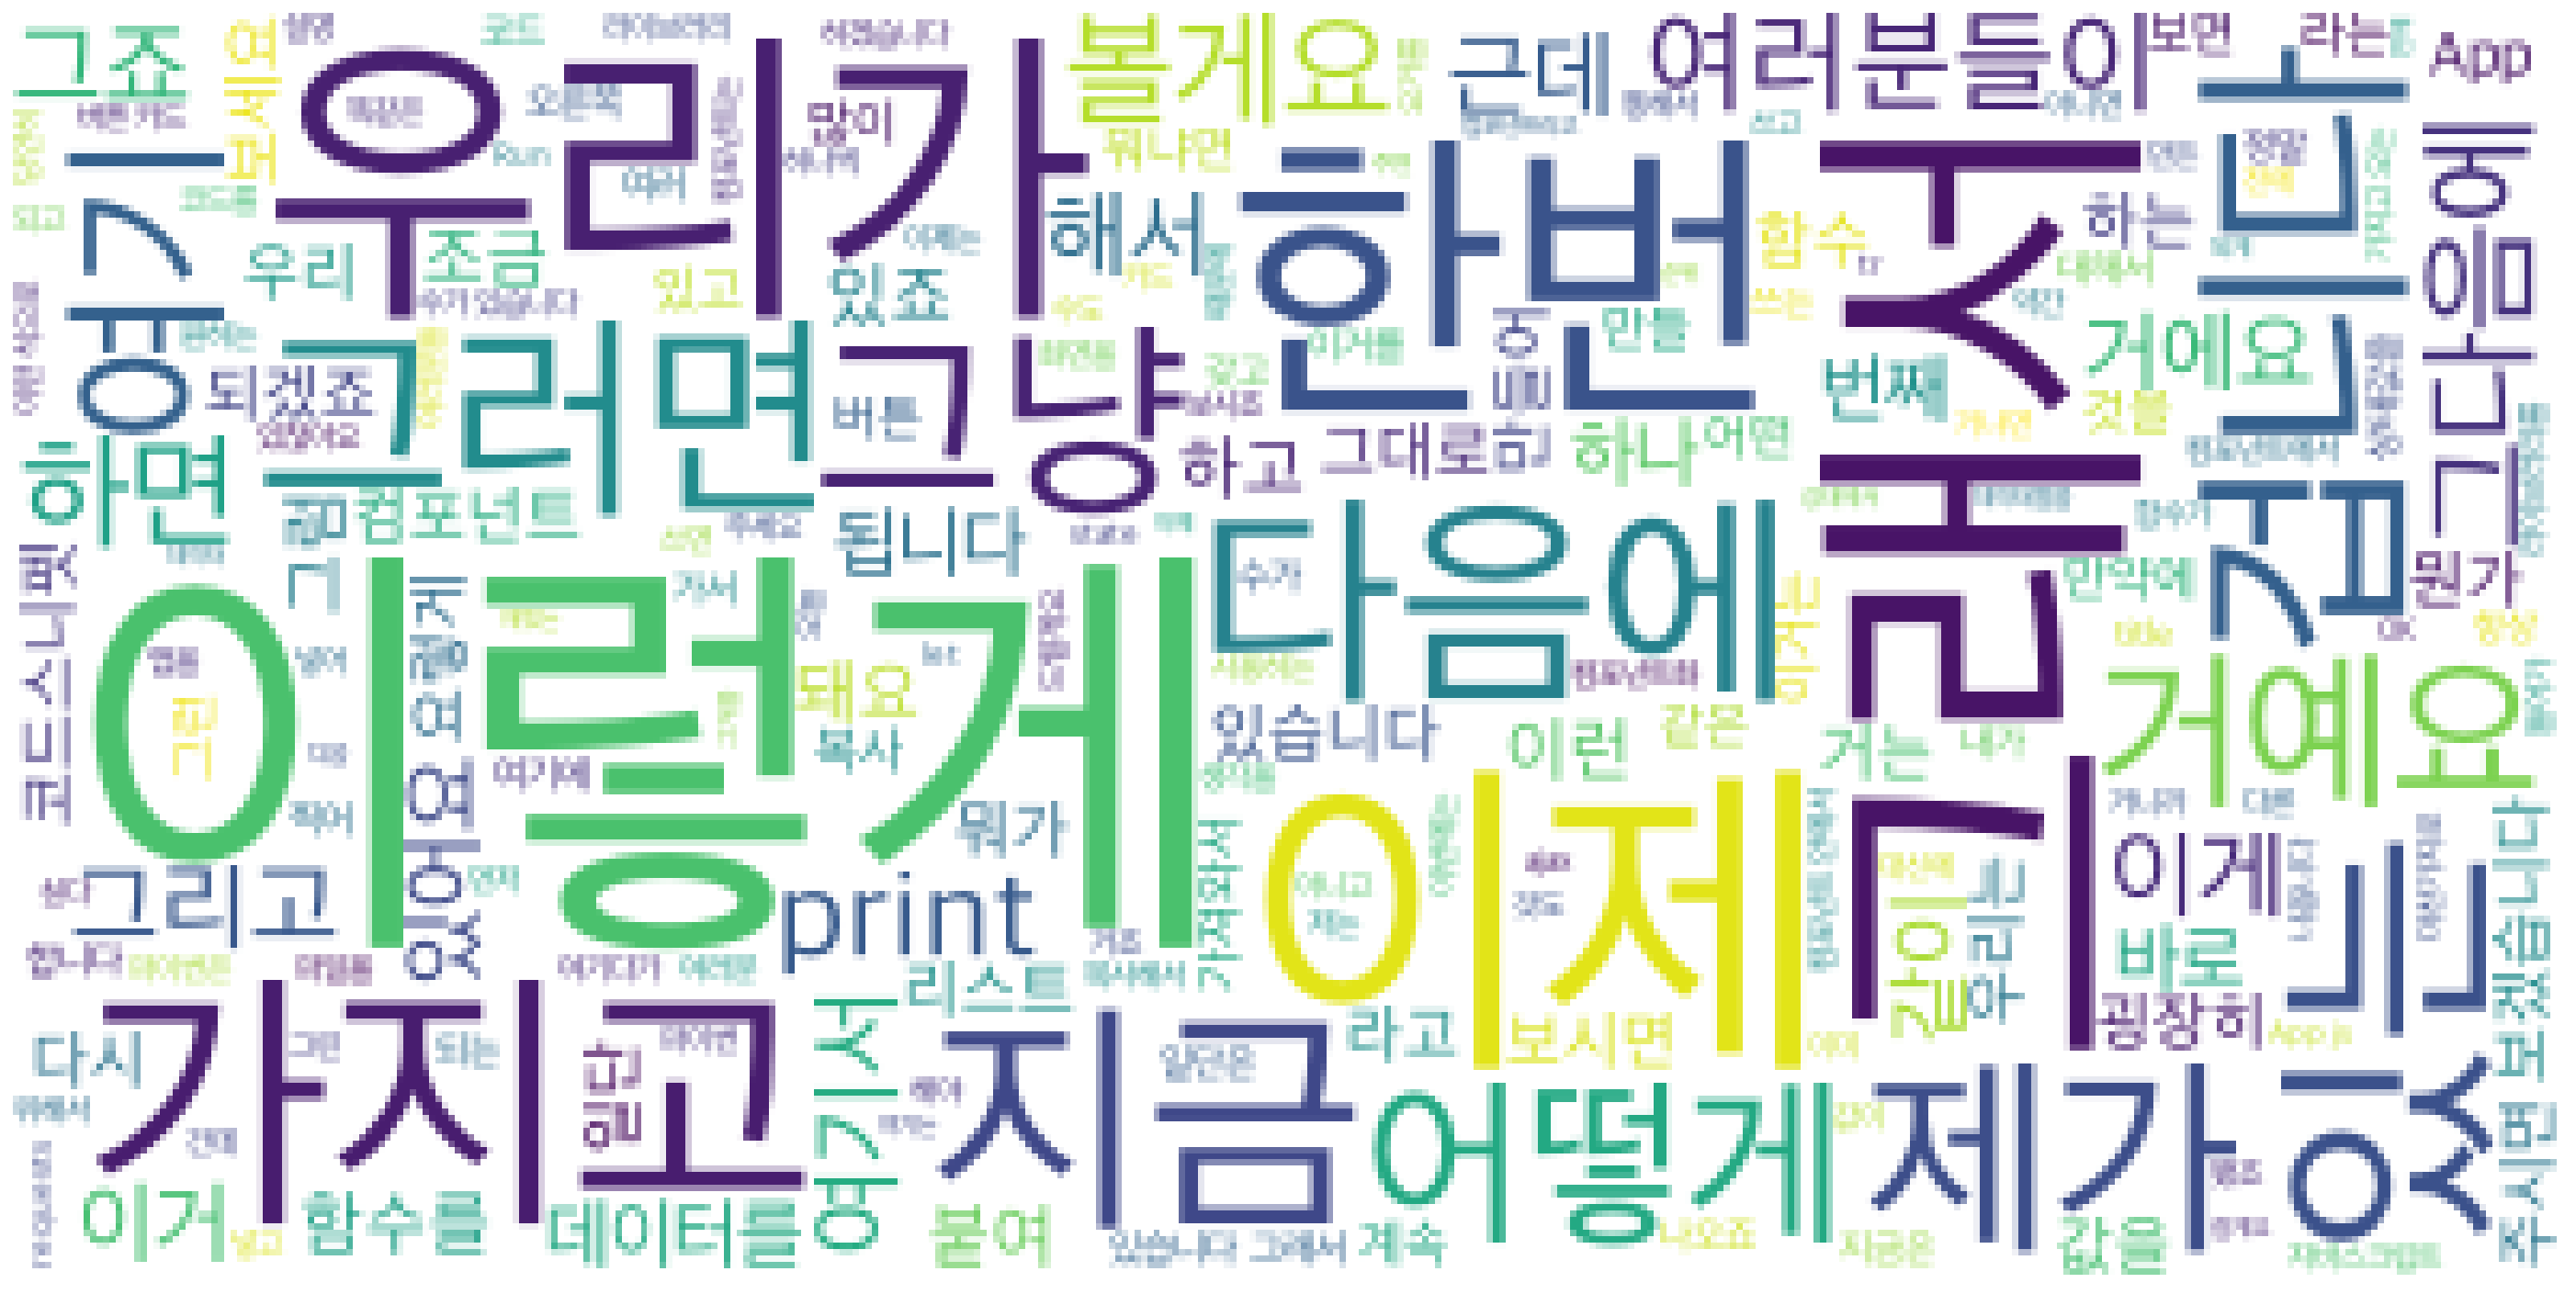

In [44]:
plt.figure(figsize=(50,50))
plt.axis("off")
plt.imshow(wc)

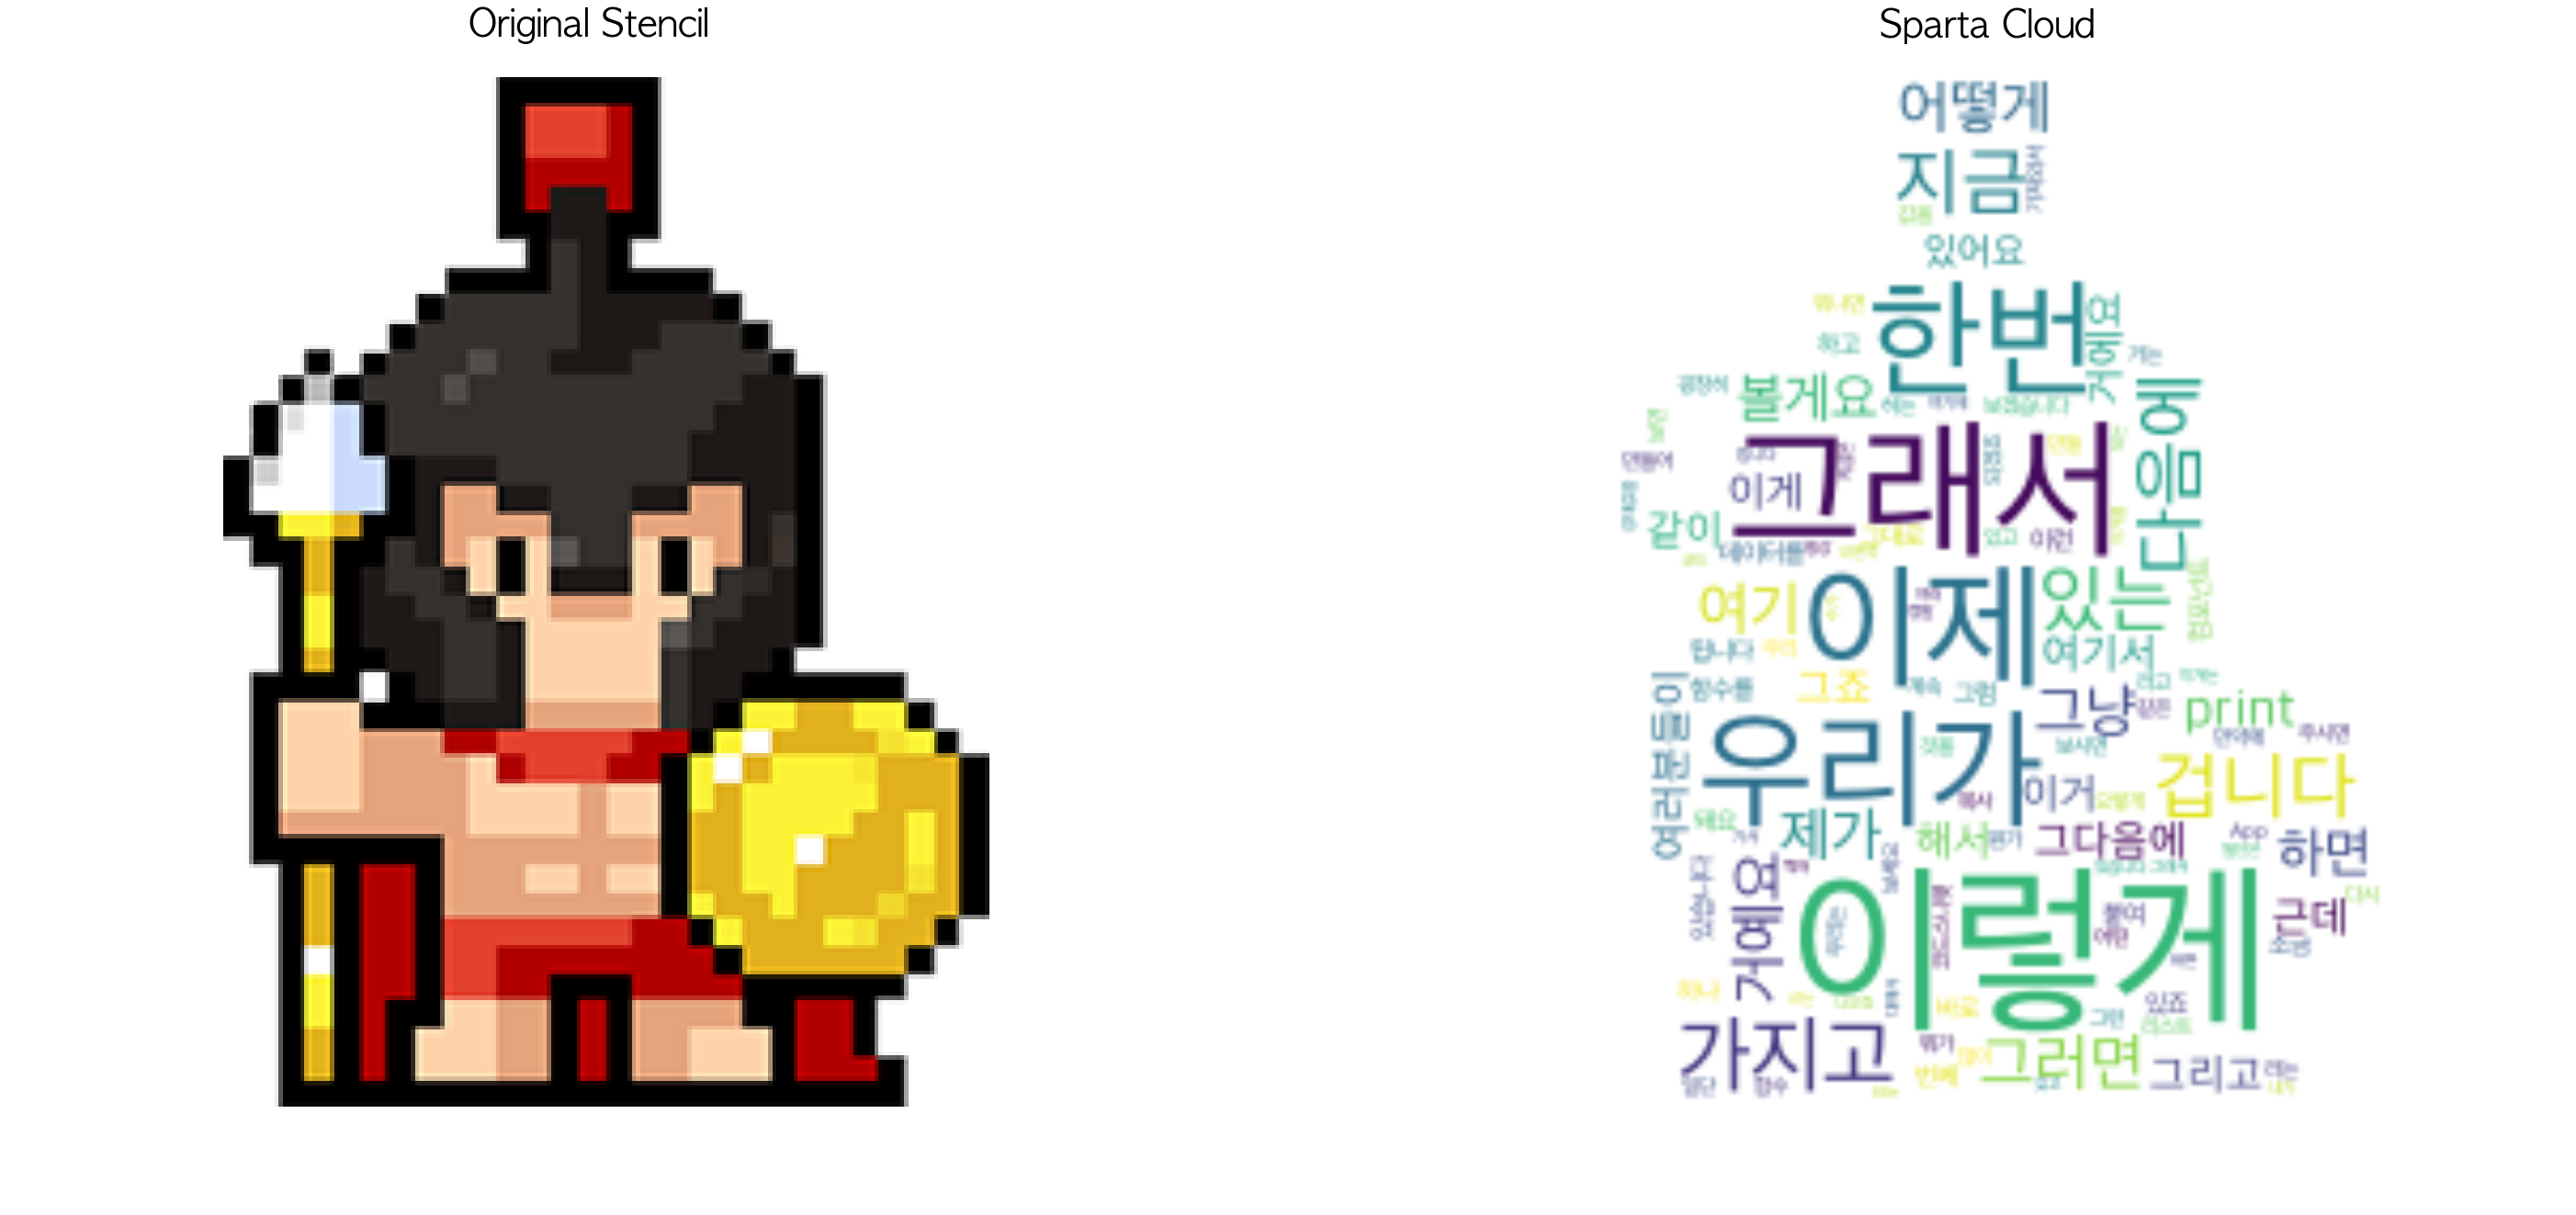

In [45]:
# Generate a word cloud image
mask = np.array(Image.open('./data/sparta.png'))
wc = WordCloud(font_path=font_path, background_color="white", mask=mask)
wc.generate(result)

f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray)
plt.title('Original Stencil', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Sparta Cloud', size=40)
plt.axis("off")
plt.show()

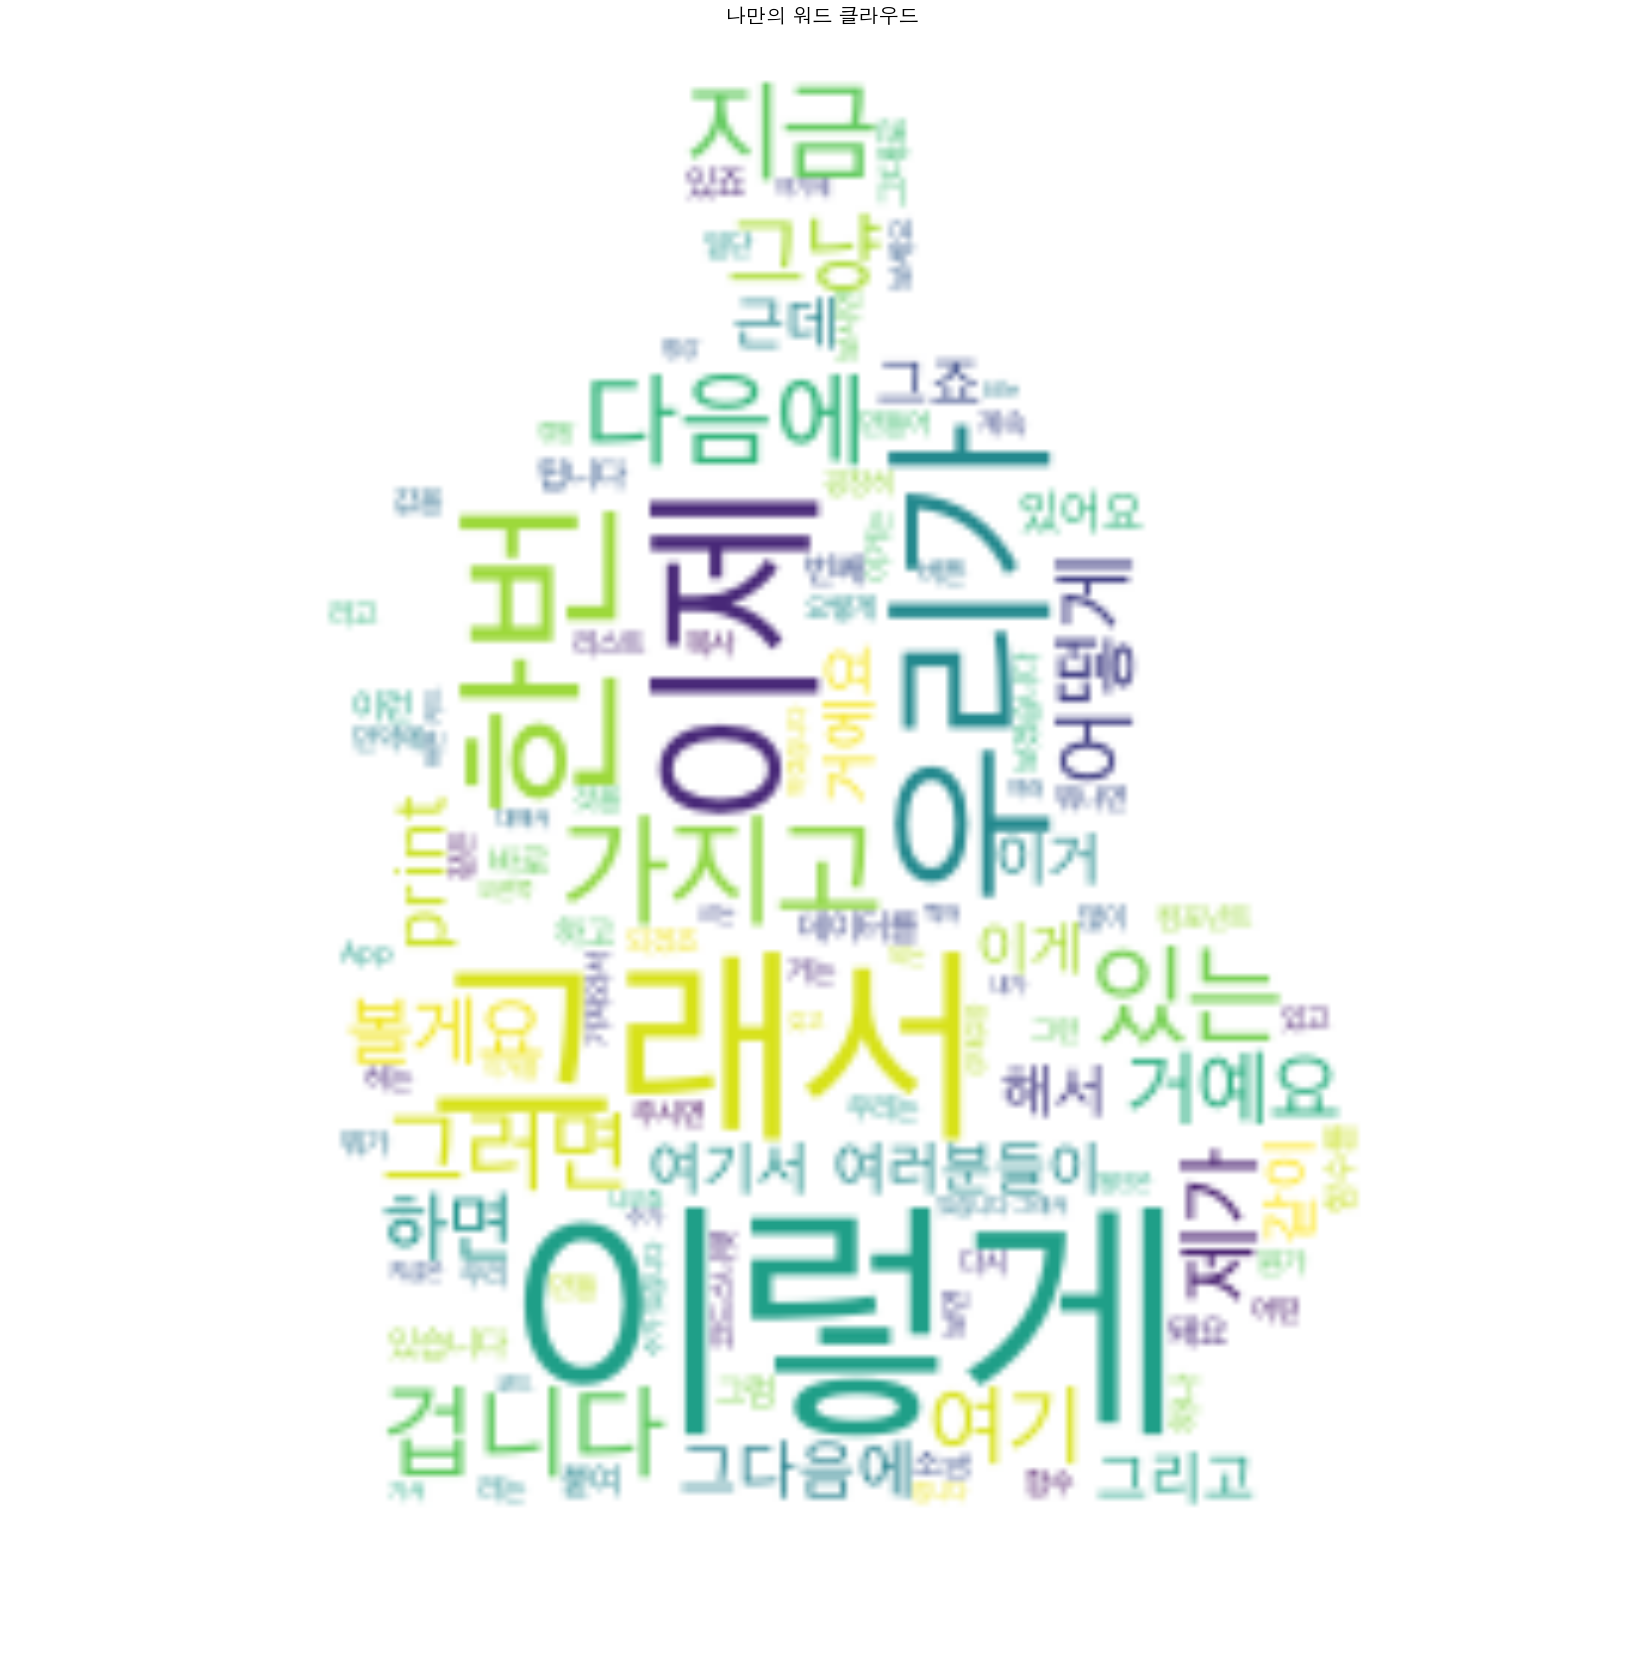

In [46]:
mask = np.array(Image.open('./data/sparta.png'))
wc = WordCloud(font_path=font_path, background_color="white", mask=mask)
wc.generate(result)

plt.figure(figsize=(30,30))
plt.imshow(wc, interpolation='bilinear')
plt.title('나만의 워드 클라우드', size=20)
plt.axis('off')

f.savefig('./data/wordcloud.png')

In [47]:
sparta_data = pd.read_csv('./data/enrolleds_detail.csv')
sparta_data.tail(5)

,lecture_id,done_date,user_id
8282,5f266927e67b8fcf4340c093,2020-09-03 16:04:05.555000,9839ad64411238ad6664450ba3e6cc2b
8283,5f266927e67b8fcf4340c094,2020-09-03 16:04:10.446000,9839ad64411238ad6664450ba3e6cc2b
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b
8286,5f275350c107da1758c81135,2020-09-03 15:40:49.006000,9839ad64411238ad6664450ba3e6cc2b


In [48]:
format="%Y-%m-%dT%H:%M:%S.%f"
sparta_data['done_date_time'] = pd.to_datetime(sparta_data['done_date'], format=format)
sparta_data.tail(5)

,lecture_id,done_date,user_id,done_date_time
8282,5f266927e67b8fcf4340c093,2020-09-03 16:04:05.555000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:05.555
8283,5f266927e67b8fcf4340c094,2020-09-03 16:04:10.446000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:10.446
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:14.513
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:05:21.233
8286,5f275350c107da1758c81135,2020-09-03 15:40:49.006000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 15:40:49.006


In [49]:
sparta_data['done_date_time_weekday'] = sparta_data['done_date_time'].dt.day_name()
sparta_data.tail(4)

,lecture_id,done_date,user_id,done_date_time,done_date_time_weekday
8283,5f266927e67b8fcf4340c094,2020-09-03 16:04:10.446000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:10.446,Thursday
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:14.513,Thursday
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:05:21.233,Thursday
8286,5f275350c107da1758c81135,2020-09-03 15:40:49.006000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 15:40:49.006,Thursday


In [50]:
weekdata = sparta_data.groupby('done_date_time_weekday')['user_id'].count()
weekdata = weekdata.agg(weeks)

Text(0.5, 1.0, '요일별 수강 완료 수강생 수')

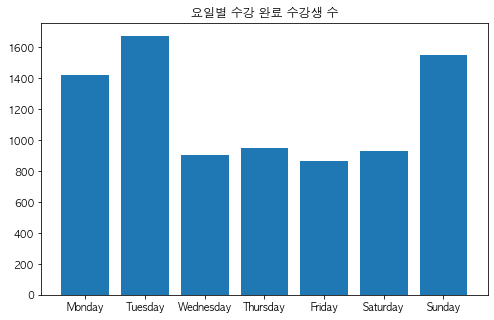

In [51]:
plt.figure(figsize=(8,5))
plt.bar(weekdata.index, weekdata)
plt.title('요일별 수강 완료 수강생 수')

In [52]:
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [53]:
sparta_data['done_date_time_hour'] = sparta_data['done_date_time'].dt.hour
sparta_data.tail(5)

,lecture_id,done_date,user_id,done_date_time,done_date_time_weekday,done_date_time_hour
8282,5f266927e67b8fcf4340c093,2020-09-03 16:04:05.555000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:05.555,Thursday,16
8283,5f266927e67b8fcf4340c094,2020-09-03 16:04:10.446000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:10.446,Thursday,16
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:14.513,Thursday,16
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:05:21.233,Thursday,16
8286,5f275350c107da1758c81135,2020-09-03 15:40:49.006000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 15:40:49.006,Thursday,15


In [54]:
hourdata = sparta_data.groupby('done_date_time_hour')['user_id'].count()
hourdata.tail(10)

done_date_time_hour
14     392
15     485
16     531
17     479
18    1152
19     453
20     530
21     592
22     591
23     432
Name: user_id, dtype: int64

([<matplotlib.axis.XTick at 0x7fa220106700>,
 <a list of 24 Text major ticklabel objects>)

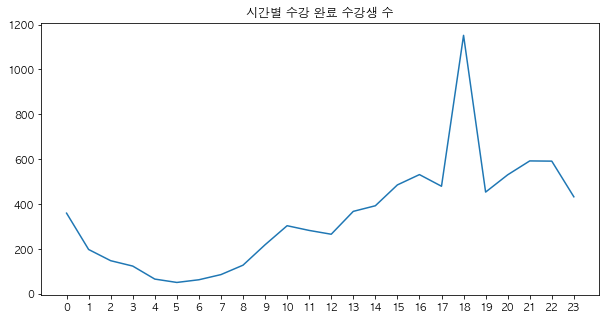

In [55]:
plt.figure(figsize=(10,5))
plt.plot(hourdata.index, hourdata)
plt.title('시간별 수강 완료 수강생 수')
# plt.xticks(range(0, 25))
plt.xticks(np.arange(24))

In [56]:
sparta_data_pivot_table = pd.pivot_table(sparta_data, values='user_id', aggfunc='count', index=['done_date_time_weekday'], columns=['done_date_time_hour']).agg(weeks)

In [57]:
sparta_data_pivot_table

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,79,31,30,27,3,5,19,14,28,24,...,64,57,105,87,73,90,127,121,127,90
Tuesday,54,27,20,12,6,3,6,14,20,26,...,41,58,70,35,740,59,67,99,92,87
Wednesday,47,19,12,8,10,15,14,4,23,20,...,36,68,41,69,81,72,58,78,83,52
Thursday,39,30,10,15,14,2,5,11,10,18,...,47,71,81,62,63,61,70,63,94,66
Friday,72,36,20,9,5,1,5,2,10,34,...,44,61,57,70,67,51,46,45,48,33
Saturday,31,17,10,22,7,4,4,19,9,51,...,72,78,66,82,55,26,48,70,52,37
Sunday,37,37,45,30,20,20,9,21,27,45,...,88,92,111,74,73,94,114,116,95,67


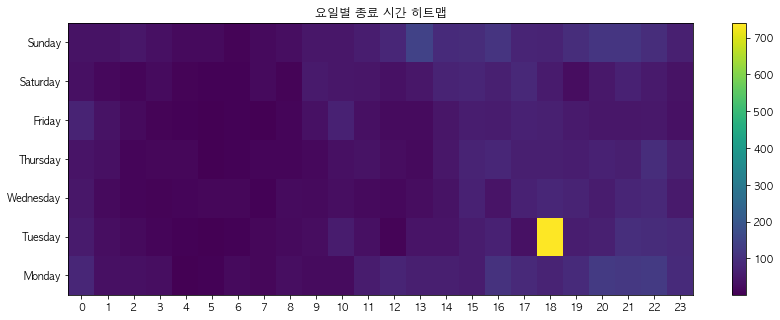

In [58]:
plt.figure(figsize=(14,5))
plt.pcolor(sparta_data_pivot_table)
plt.yticks(np.arange(0.5,len(sparta_data_pivot_table.index),1),sparta_data_pivot_table.index)
plt.xticks(np.arange(0.5,len(sparta_data_pivot_table.columns),1),sparta_data_pivot_table.columns)
plt.title('요일별 종료 시간 히트맵')
plt.colorbar()